In [1]:
import pandas as pd
import lasio
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/15_9-19A-CORE.csv')

In [3]:
df

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,3999.05,3998.85,7,724,4980.00,4850.000,NaN,NaN,28.9,NaN,NaN,NaN,2.65,NaN
724,3999.20,3999.00,7,725,3460.00,3350.000,NaN,NaN,20.7,NaN,NaN,NaN,2.66,NaN
725,3999.45,3999.25,7,726,3600.00,3490.000,NaN,NaN,20.9,NaN,NaN,NaN,2.64,NaN
726,3999.70,3999.50,7,727,180.00,163.000,479.00,448.00,17.3,NaN,NaN,NaN,2.64,NaN


# Creating the Figure with Subplots

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_62774/733088517.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)


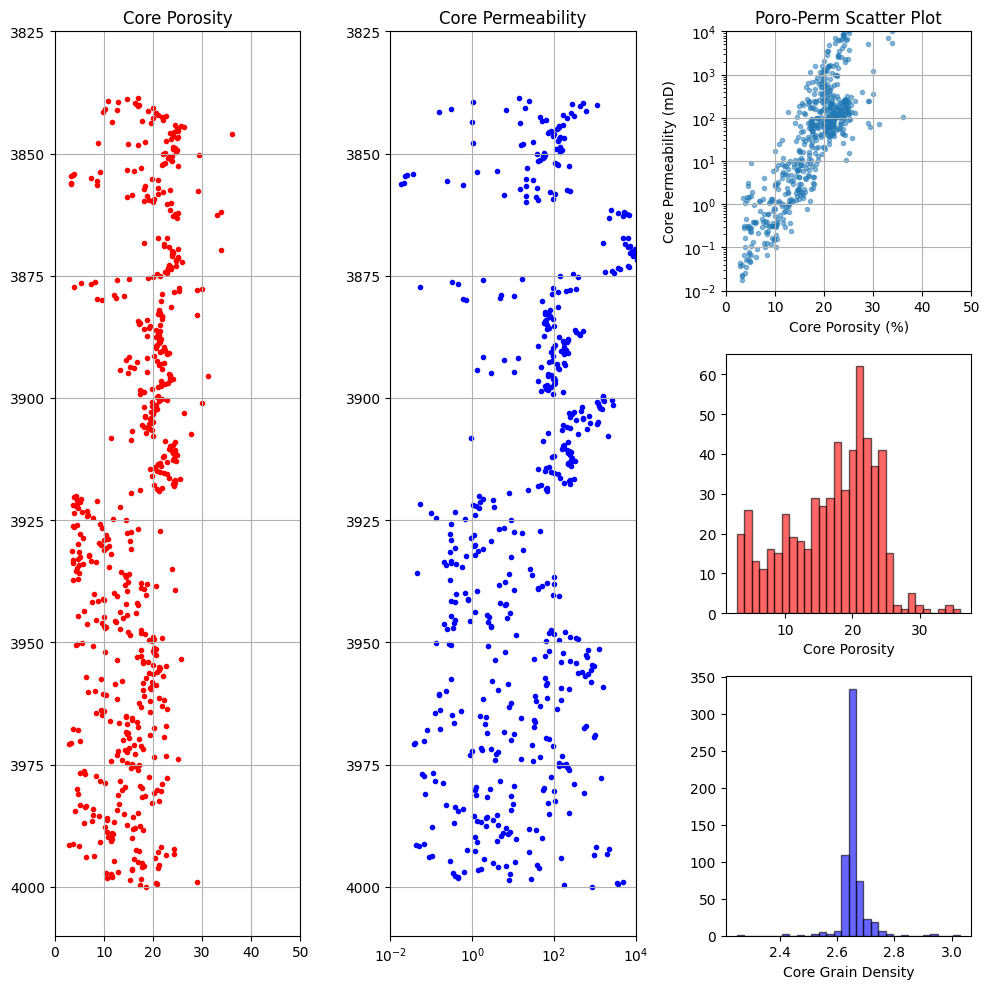

In [27]:
# Create the figure
fig, ax = plt.subplots(figsize =(10,10))

# Add the axes /subplots using subplots2grid
ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2))
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2))
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2))

# Add ax1 to show CPOR (Core Porosity) vs DEPTH
ax1.scatter(df['CPOR'], df['DEPTH'], marker = '.', color = 'red')
ax1.set(xlim=(0,50), ylim=(4010, 3825), title='Core Porosity')
ax1.grid()

# Add ax2 to show CKHG (Core Permeability) vs DEPTH
ax2.scatter(df['CKHG'], df['DEPTH'], marker='.', c='blue')
ax2.set(xlim=(0.01, 10000), ylim=(4010, 3825), title='Core Permeability')
ax2.semilogx()
ax2.grid()

#Add ax3 to show CPOR (Core Porosity) vs CKHG (Core Permeability)
ax3.scatter(df['CPOR'], df['CKHG'], marker='.', alpha=0.5)
ax3.set(xlim=(0,50), ylim=(0.01, 10000), title='Poro-Perm Scatter Plot', xlabel='Core Porosity (%)', ylabel='Core Permeability (mD)')
ax3.semilogy()
ax3.grid()

#Add ax4 to show a histogram of CPOR - Core Porosity
ax4.hist(df['CPOR'], bins=30, edgecolor='black', color='red', alpha=0.6)
ax4.set_xlabel('Core Porosity')

#Add ax5 to show a histogram of CGD - Core Grain Density
ax5.hist(df['CGD'], bins=30, edgecolor='black', color='blue', alpha=0.6)
ax5.set_xlabel('Core Grain Density')

plt.tight_layout()
plt.savefig('images/CoreDataDashBoard.png', dpi=300)
plt.show()

# Adding Interpreted Data as Line Plots

In [36]:
cpi = lasio.read('data/15_9-19_A_CPI.las').df()
cpi

Only engine='normal' can read wrapped files


,BS,BVW,CARB_FLAG,COAL_FLAG,DELTA,GRMAX,GRMIN,J,KLHC_INT,KLOGH,...,PHIF,PORD,RHOFL,RHOMA,RW,SAND_FLAG,SW,SWIRR,TEMP,VSH
DEPTH,,,,,,,,,,,,,,,,,,,,,
3666.5916,8.5,0.111705,0.0,0.0,0.1475,115.0,14.0,0.000163,0.0003,0.0003,...,0.199843,0.199843,0.8,2.66,0.021643,0.0,0.5590,1.8023,112.7249,0.598800
3666.7440,8.5,0.112236,0.0,0.0,0.3583,115.0,14.0,0.000003,0.0000,0.0000,...,0.218743,0.218743,0.8,2.66,0.021642,0.0,0.5131,7.9467,112.7285,0.599555
3666.8964,8.5,0.114825,0.0,0.0,0.1298,115.0,14.0,0.000004,0.0000,0.0000,...,0.242380,0.242380,0.8,2.66,0.021642,0.0,0.4737,6.5907,112.7321,0.600310
3667.0488,8.5,0.114419,0.0,0.0,0.2489,115.0,14.0,0.000002,0.0000,0.0000,...,0.226408,0.226408,0.8,2.66,0.021641,0.0,0.5054,8.6274,112.7358,0.601065
3667.2012,8.5,0.115867,0.0,0.0,0.2072,115.0,14.0,0.000004,0.0000,0.0000,...,0.216169,0.216169,0.8,2.66,0.021640,0.0,0.5360,6.8473,112.7394,0.601820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4124.2488,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817
4124.4012,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817
4124.5536,8.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,0.422817


In [37]:
cpi['PHIF']=cpi['PHIF']*100
cpi.columns

Index(['BS', 'BVW', 'CARB_FLAG', 'COAL_FLAG', 'DELTA', 'GRMAX', 'GRMIN', 'J',
       'KLHC_INT', 'KLOGH', 'M', 'N', 'PERF_FLAG', 'PHIF', 'PORD', 'RHOFL',
       'RHOMA', 'RW', 'SAND_FLAG', 'SW', 'SWIRR', 'TEMP', 'VSH'],
      dtype='object')

In [42]:
cpi.index # 'DEPTH'

Index([3666.5916,  3666.744, 3666.8964, 3667.0488, 3667.2012, 3667.3536,
        3667.506, 3667.6584, 3667.8108, 3667.9632,
       ...
       4123.4868, 4123.6392, 4123.7916,  4123.944, 4124.0964, 4124.2488,
       4124.4012, 4124.5536,  4124.706, 4124.8584],
      dtype='float64', name='DEPTH', length=3008)

/var/folders/1y/p14x729x77z3ykk1y391m39c0000gn/T/ipykernel_62774/1430524471.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)


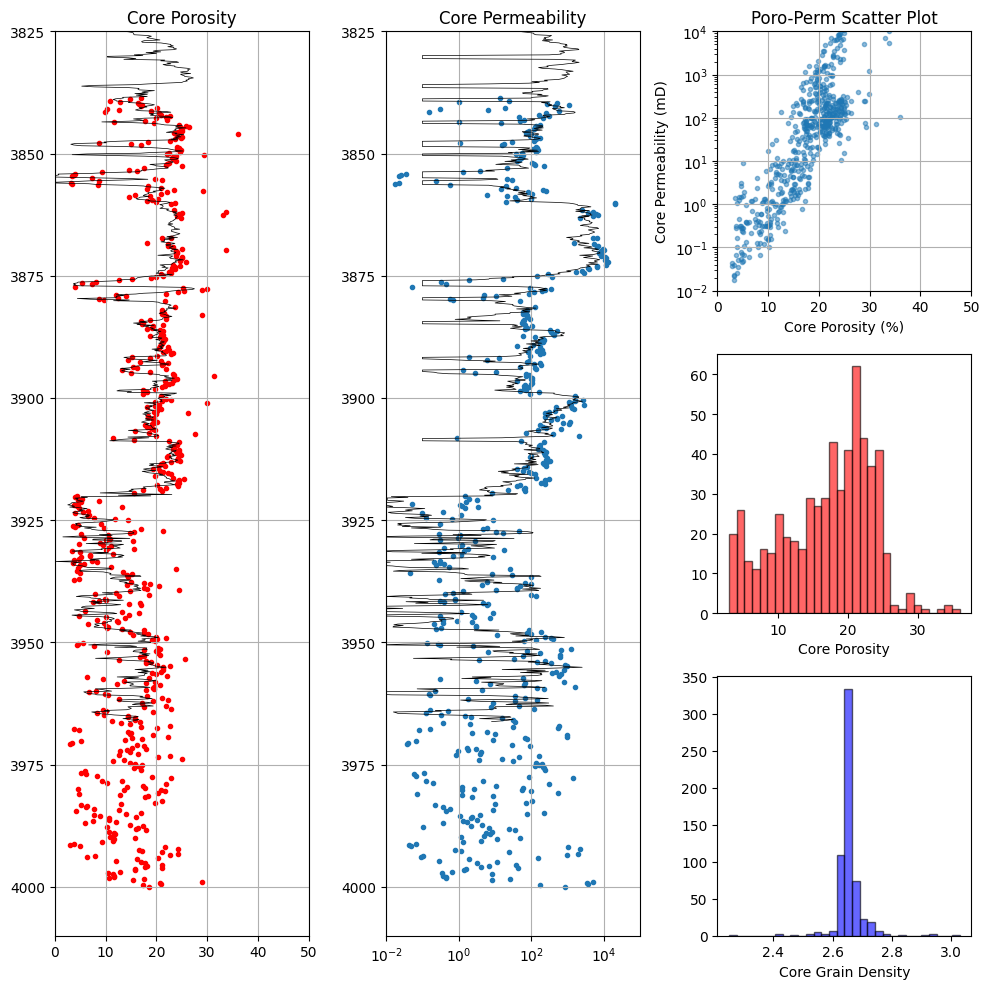

In [45]:
#Add lines from the CPI dataframe to the plot.

#Create the figure
fig, ax = plt.subplots(figsize=(10,10))

#Add the axes / subplots using subplot2grid
ax1 = plt.subplot2grid(shape=(3,3), loc=(0,0), rowspan=3)
ax2 = plt.subplot2grid(shape=(3,3), loc=(0,1), rowspan=3)
ax3 = plt.subplot2grid(shape=(3,3), loc=(0,2))
ax4 = plt.subplot2grid(shape=(3,3), loc=(1,2))
ax5 = plt.subplot2grid(shape=(3,3), loc=(2,2))

#Add ax1 to show CPOR (Core Porosity) vs DEPTH
ax1.scatter(df['CPOR'], df['DEPTH'], marker='.', c='red')
ax1.plot(cpi['PHIF'], cpi.index, c='black', lw=0.5)
ax1.set_xlim(0, 50)
ax1.set_ylim(4010, 3825)
ax1.set_title('Core Porosity')
ax1.grid()

#Add ax2 to show CKHG (Core Permeability) vs DEPTH
ax2.scatter(df['CKHG'], df['DEPTH'], marker='.')
ax2.plot(cpi['KLOGH'], cpi.index, c='black', lw=0.5)
ax2.set_xlim(0.01, 100000)
ax2.set_ylim(4010, 3825)
ax2.semilogx()
ax2.set_title('Core Permeability')
ax2.grid()

#Add ax3 to show CPOR (Core Porosity) vs CKHG (Core Permeability)
ax3.scatter(df['CPOR'], df['CKHG'], marker='.', alpha=0.5)
ax3.set(xlim=(0,50), ylim=(0.01, 10000), title='Poro-Perm Scatter Plot', xlabel='Core Porosity (%)', ylabel='Core Permeability (mD)')
ax3.semilogy()
ax3.grid()

#Add ax4 to show a histogram of CPOR - Core Porosity
ax4.hist(df['CPOR'], bins=30, edgecolor='black', color='red', alpha=0.6)
ax4.set_xlabel('Core Porosity')

#Add ax5 to show a histogram of CGD - Core Grain Density
ax5.hist(df['CGD'], bins=30, edgecolor='black', color='blue', alpha=0.6)
ax5.set_xlabel('Core Grain Density')

plt.tight_layout()
plt.savefig('images/CoreDataDashBoard2.png', dpi=300)
plt.show()